
Rotem Shimon



# Task Number 4

Our objective is to develop a machine learning model using linear regression to predict house prices in Ames, Iowa. By leveraging various property features, we aim to identify meaningful patterns in the data and build an accurate predictive model.


# Imports and Loading the Dataset


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from IPython.display import display
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


# Load the dataset
data_path = r"C:\Users\Rotem\Downloads\train.csv"
data = pd.read_csv(data_path, index_col="Id")

ModuleNotFoundError: No module named 'pandas'

# Data Visualization & Preproccesing

In [ ]:
# Data Visualization
print("Dataset Overview:")
display(data.head())
print("\nDataset Information:")
display(data.info())

Dataset Overview:


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int6

None

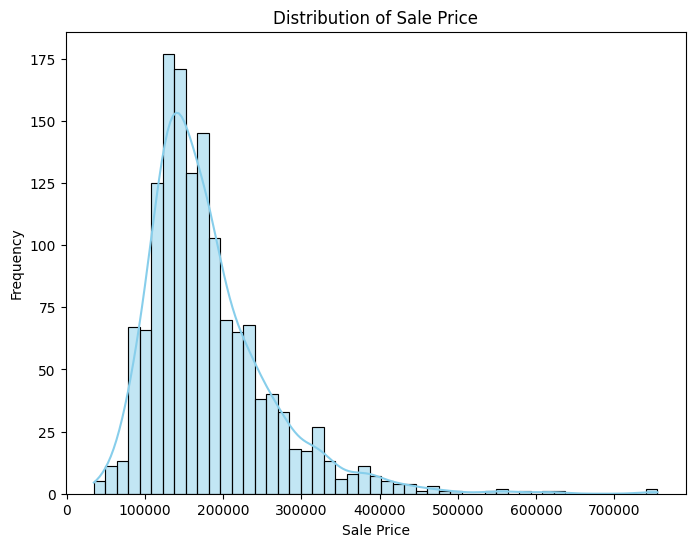

In [ ]:
# Distribution of SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(data['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

We use a boxplot to compare the distribution of `SalePrice` across different neighborhoods. This helps us identify pricing patterns, detect potential outliers, and understand how location influences house prices.


<ipython-input-4-60b697ea1636>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Neighborhood', y='SalePrice', data=data, palette='viridis')


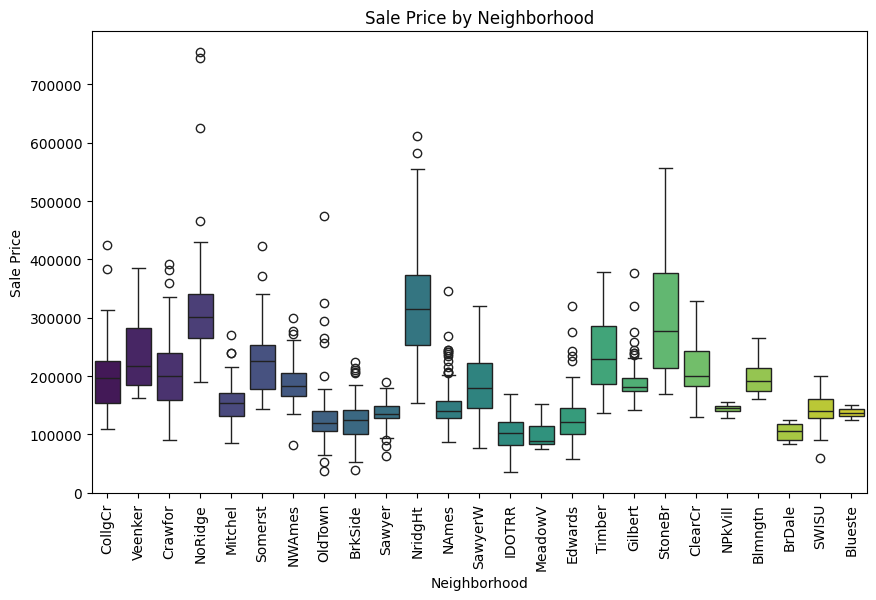

In [ ]:
# Boxplot of SalePrice by Neighborhood
plt.figure(figsize=(10, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=data, palette='viridis')
plt.xticks(rotation=90)
plt.title('Sale Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.show()

The heatmap shows the correlation between numerical features. This helps us understand which features are most strongly related to `SalePrice` and might be useful for modeling.

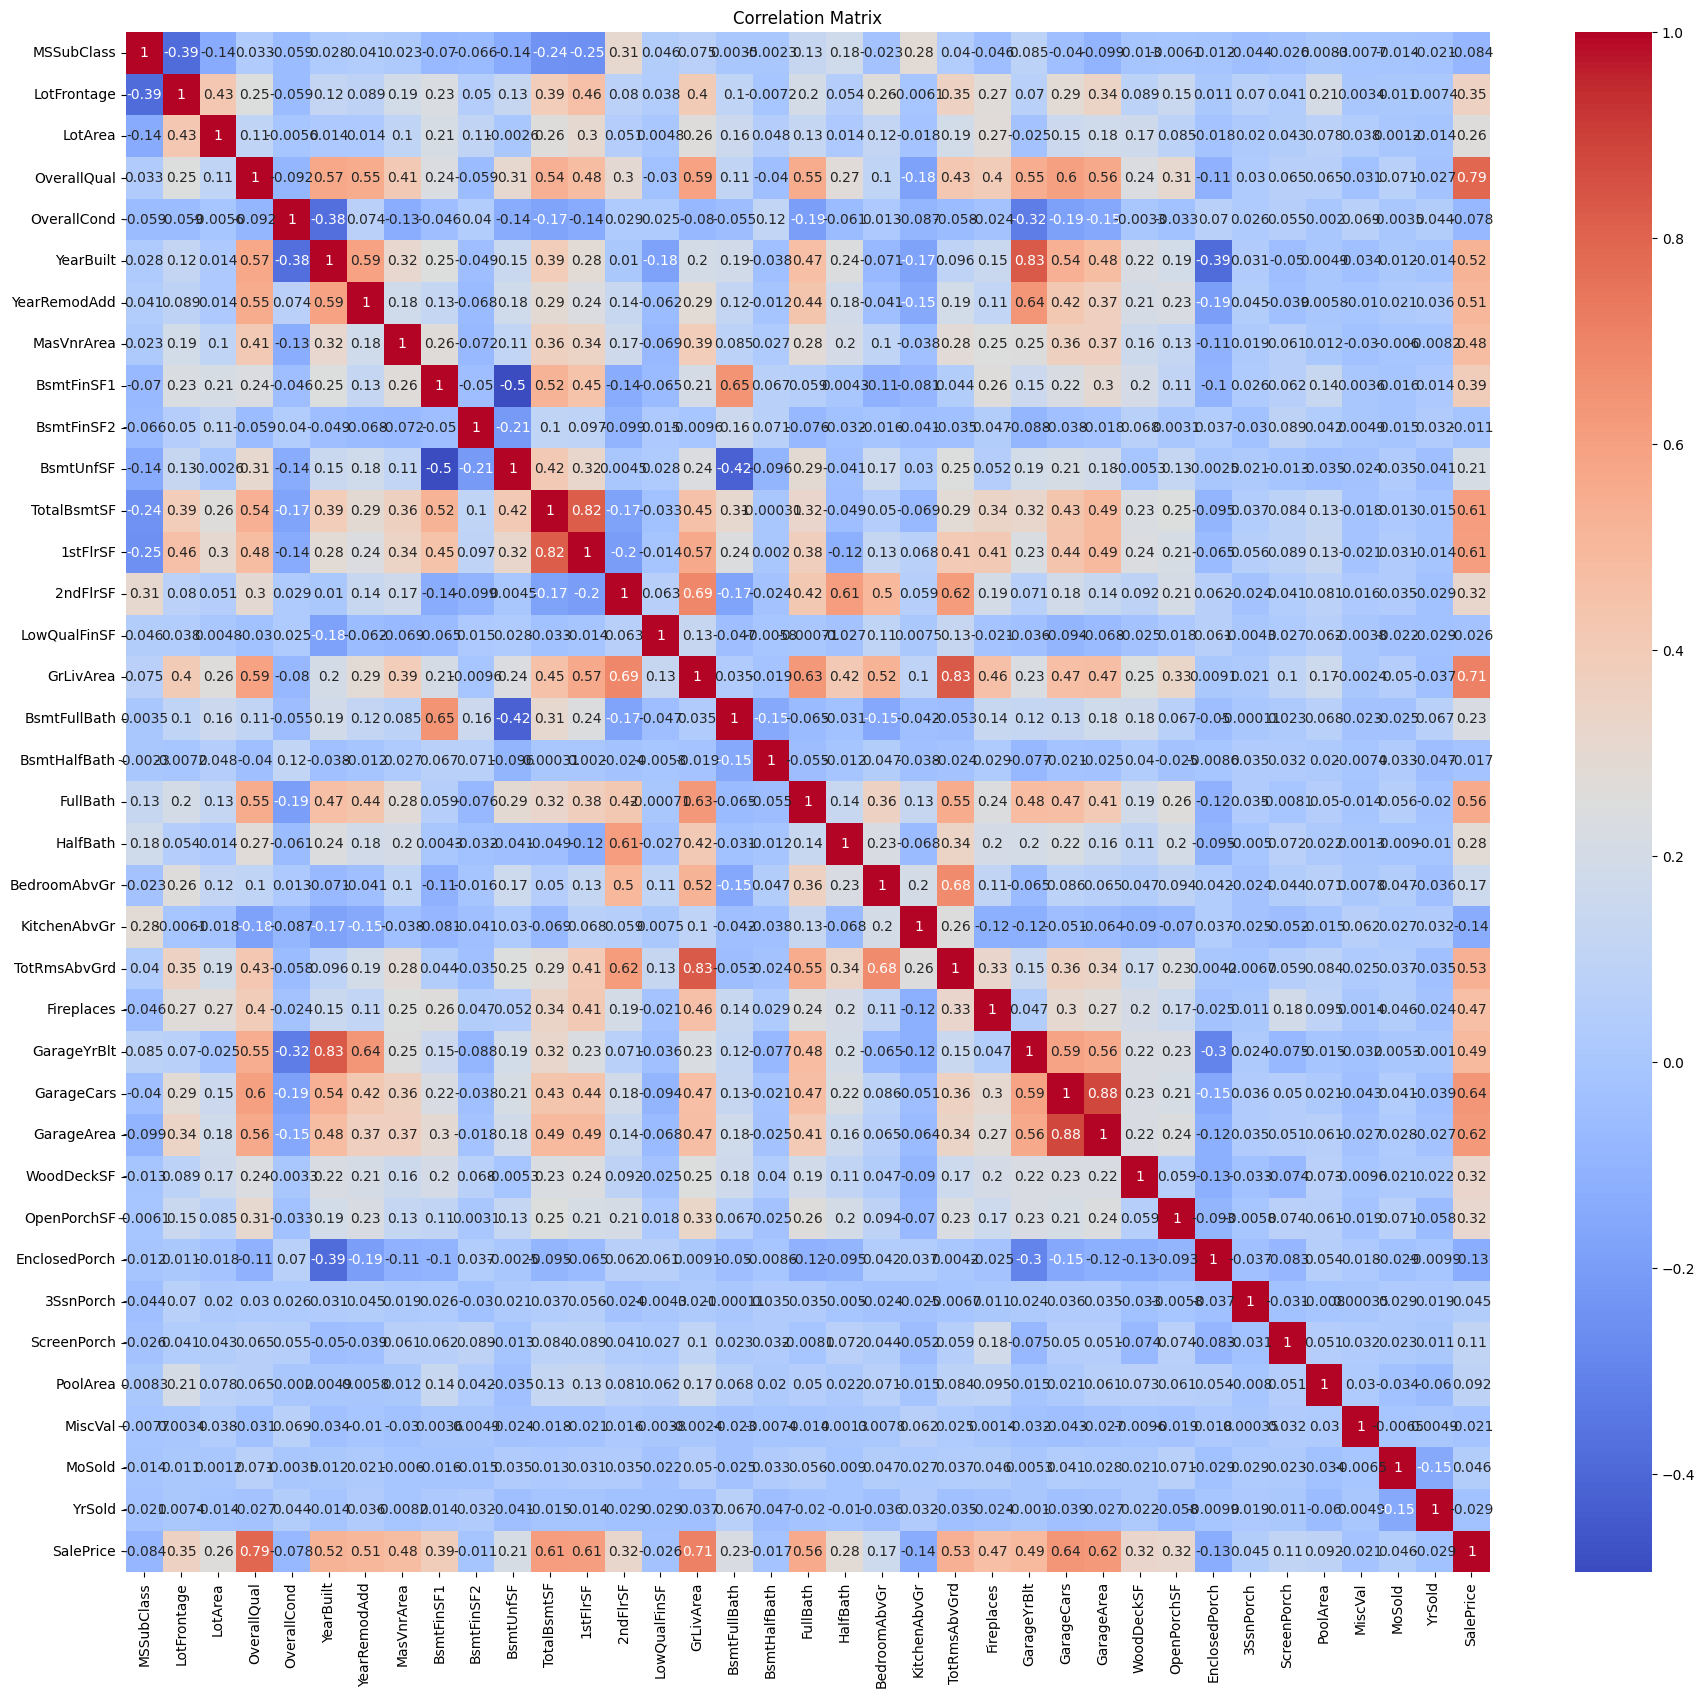

In [ ]:
# Correlation Matrix
correlation = data.corr(numeric_only=True)
plt.figure(figsize=(22, 20))
sns.heatmap(correlation, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

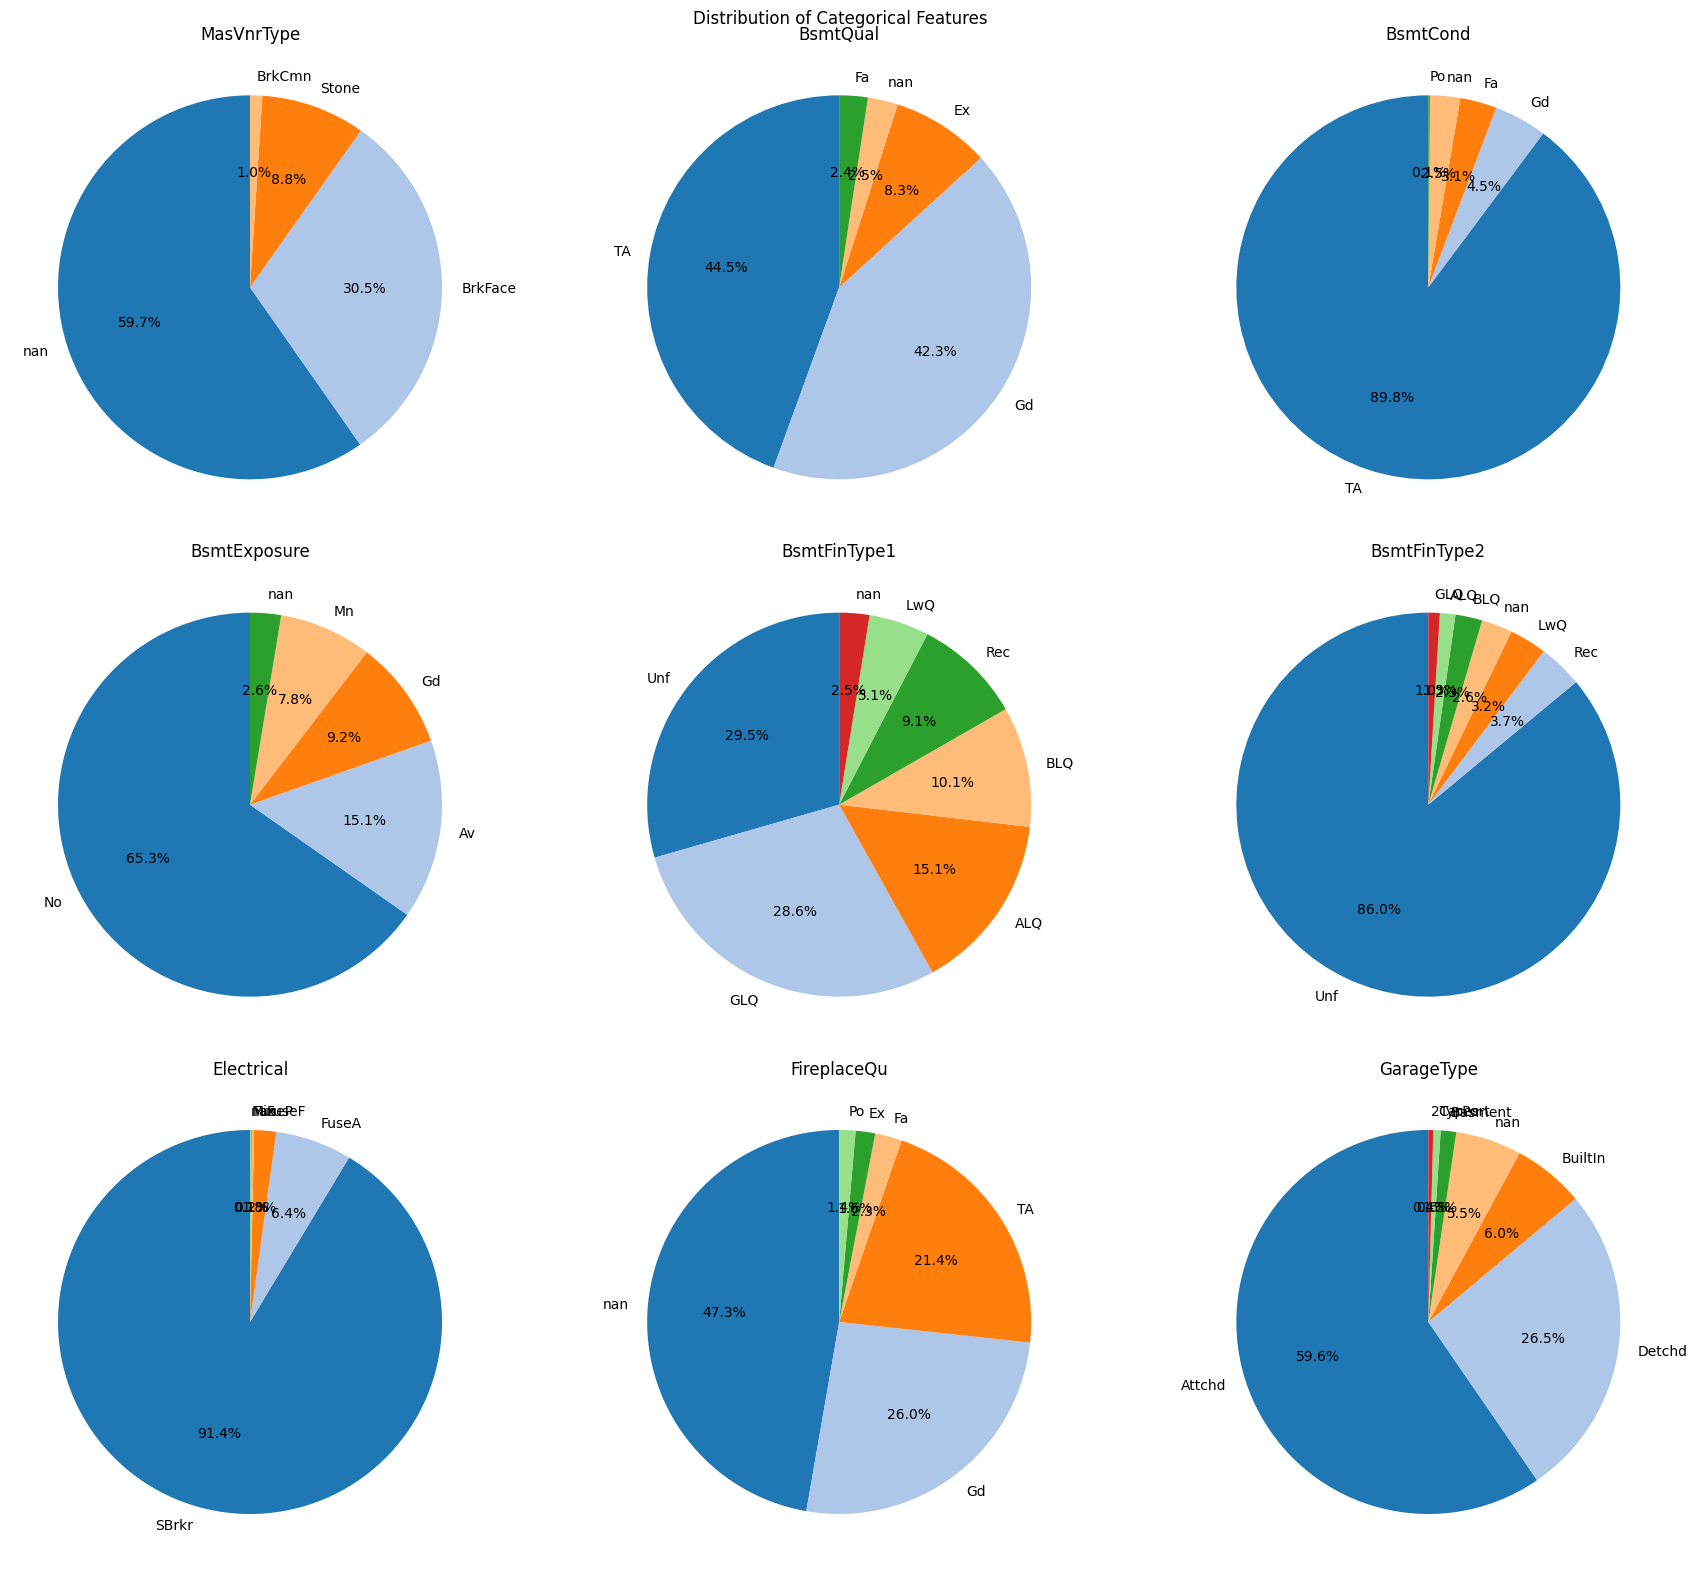

In [ ]:
# Pie Charts for Categorical Features
categorical_columns = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType']

fig, axes = plt.subplots(3, 3, figsize=(18, 16))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    data[col].value_counts(dropna=False).plot.pie(
        autopct='%1.1f%%', 
        ax=axes[i], 
        legend=False, 
        startangle=90, 
        colors=plt.cm.tab20.colors
    )
    axes[i].set_title(col)
    axes[i].set_ylabel('')

plt.suptitle('Distribution of Categorical Features', fontsize=12)
plt.tight_layout()
plt.show()

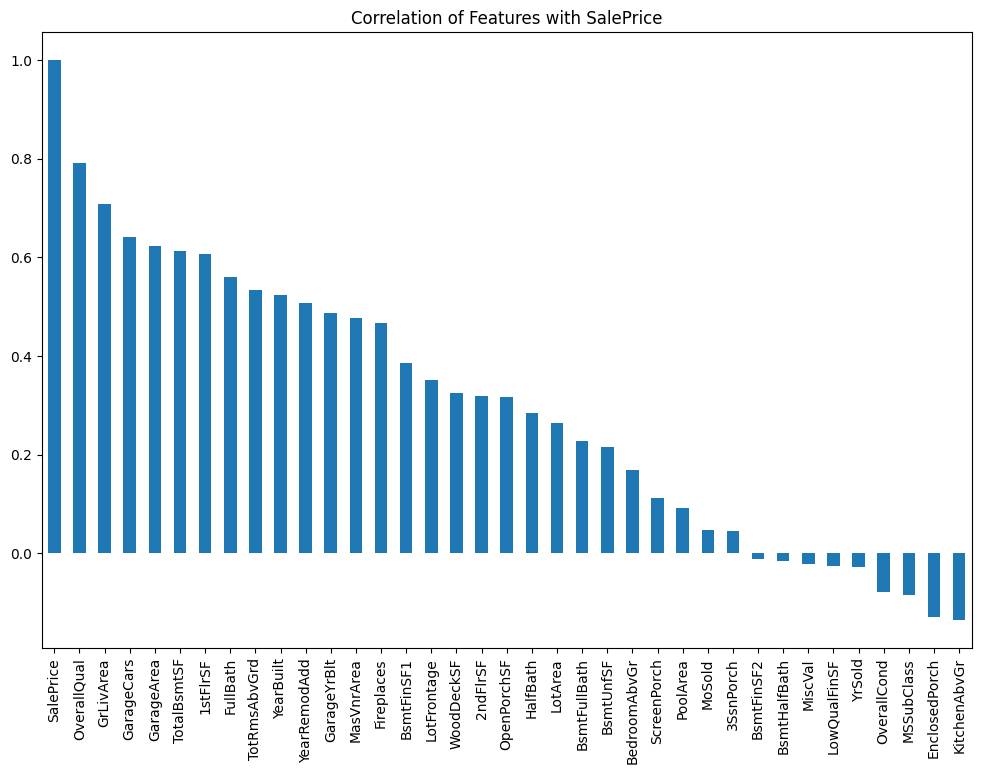

In [ ]:
# Calculate correlation with SalePrice and sort
correlations = data.corr(numeric_only=True)['SalePrice'].dropna().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
correlations.plot(kind='bar')
plt.title('Correlation of Features with SalePrice')
plt.xticks(rotation=90)
plt.show()

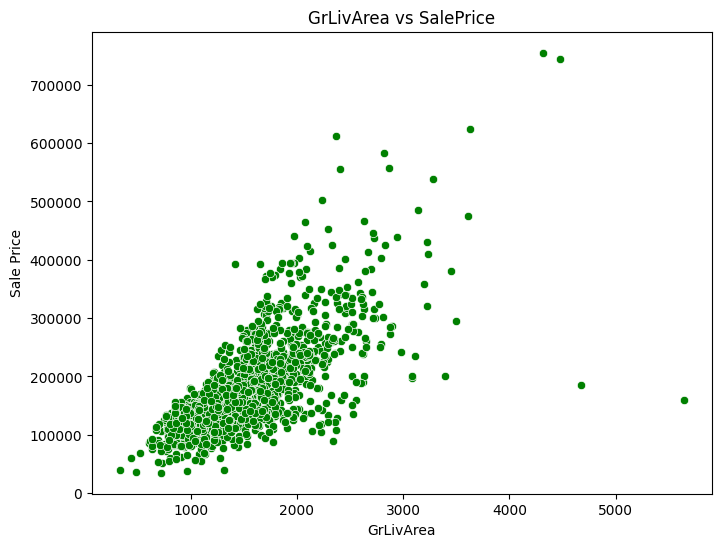

In [ ]:
# Visualization 4: Scatterplot of GrLivArea vs SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data, color='green')
plt.title('GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.show()

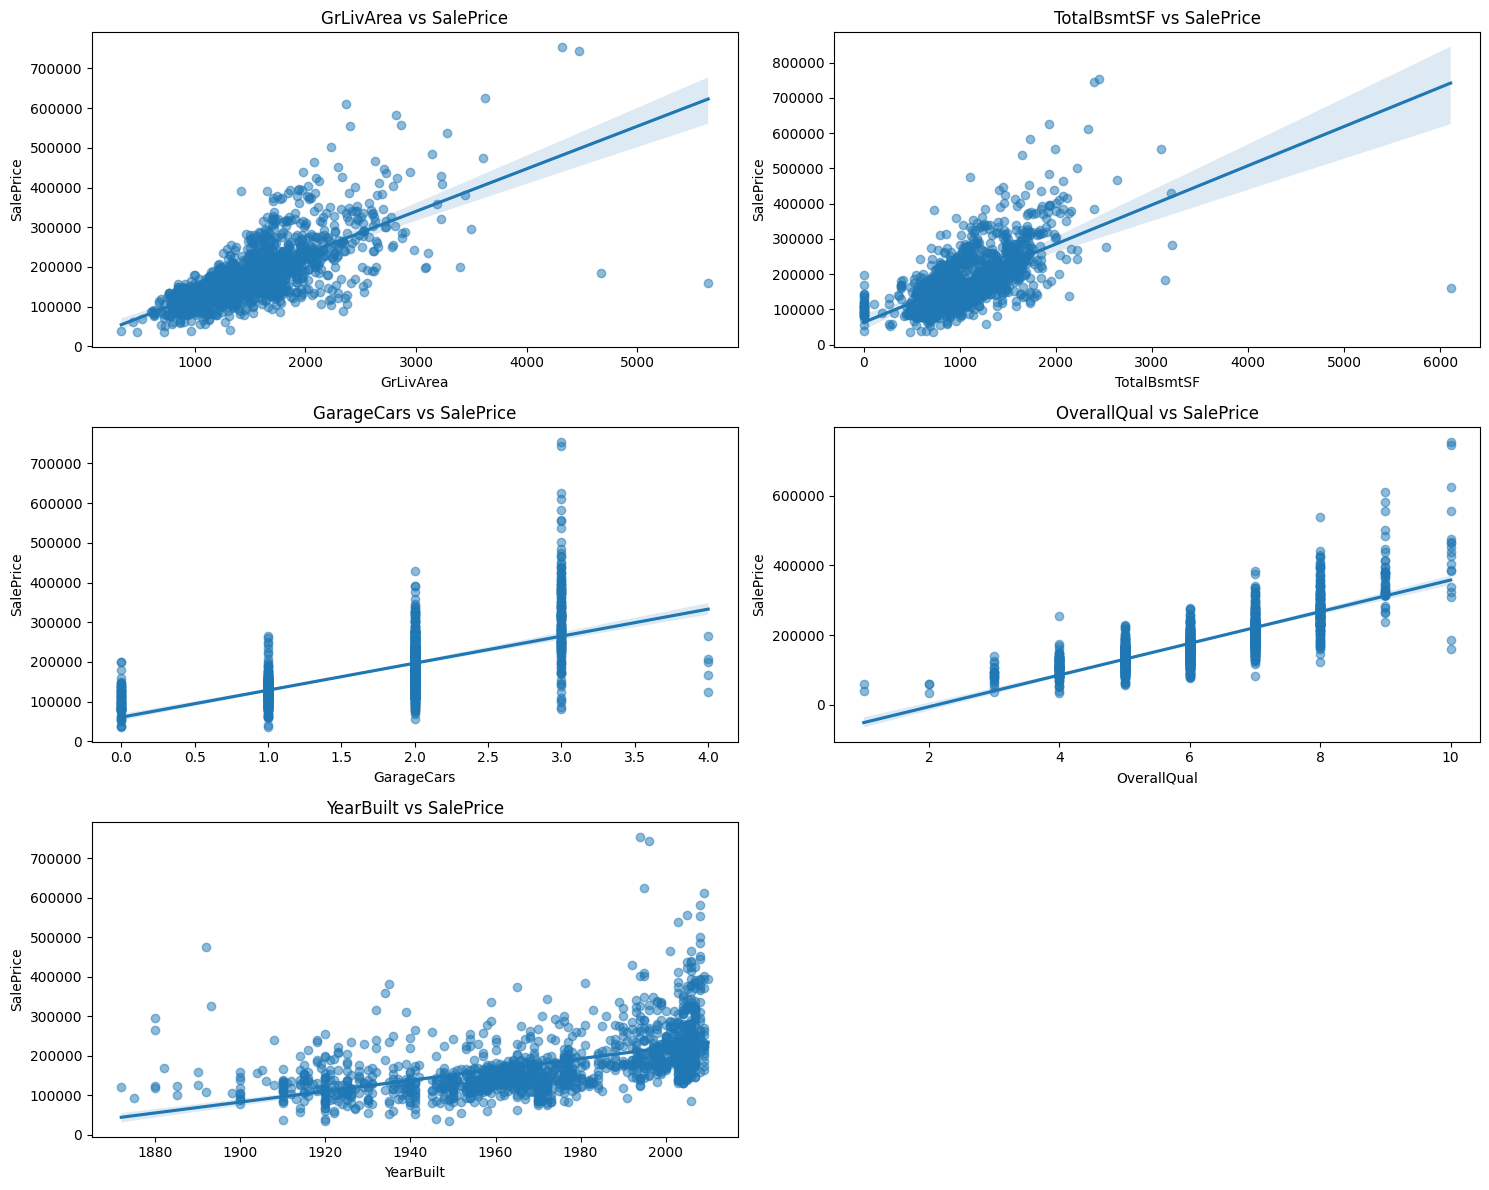

In [ ]:
important_features = ['GrLivArea', 'TotalBsmtSF', 'GarageCars', 'OverallQual', 'YearBuilt']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(important_features, 1):
    plt.subplot(3, 2, i)
    sns.regplot(x=data[feature], y=data['SalePrice'], scatter_kws={'alpha':0.5})
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

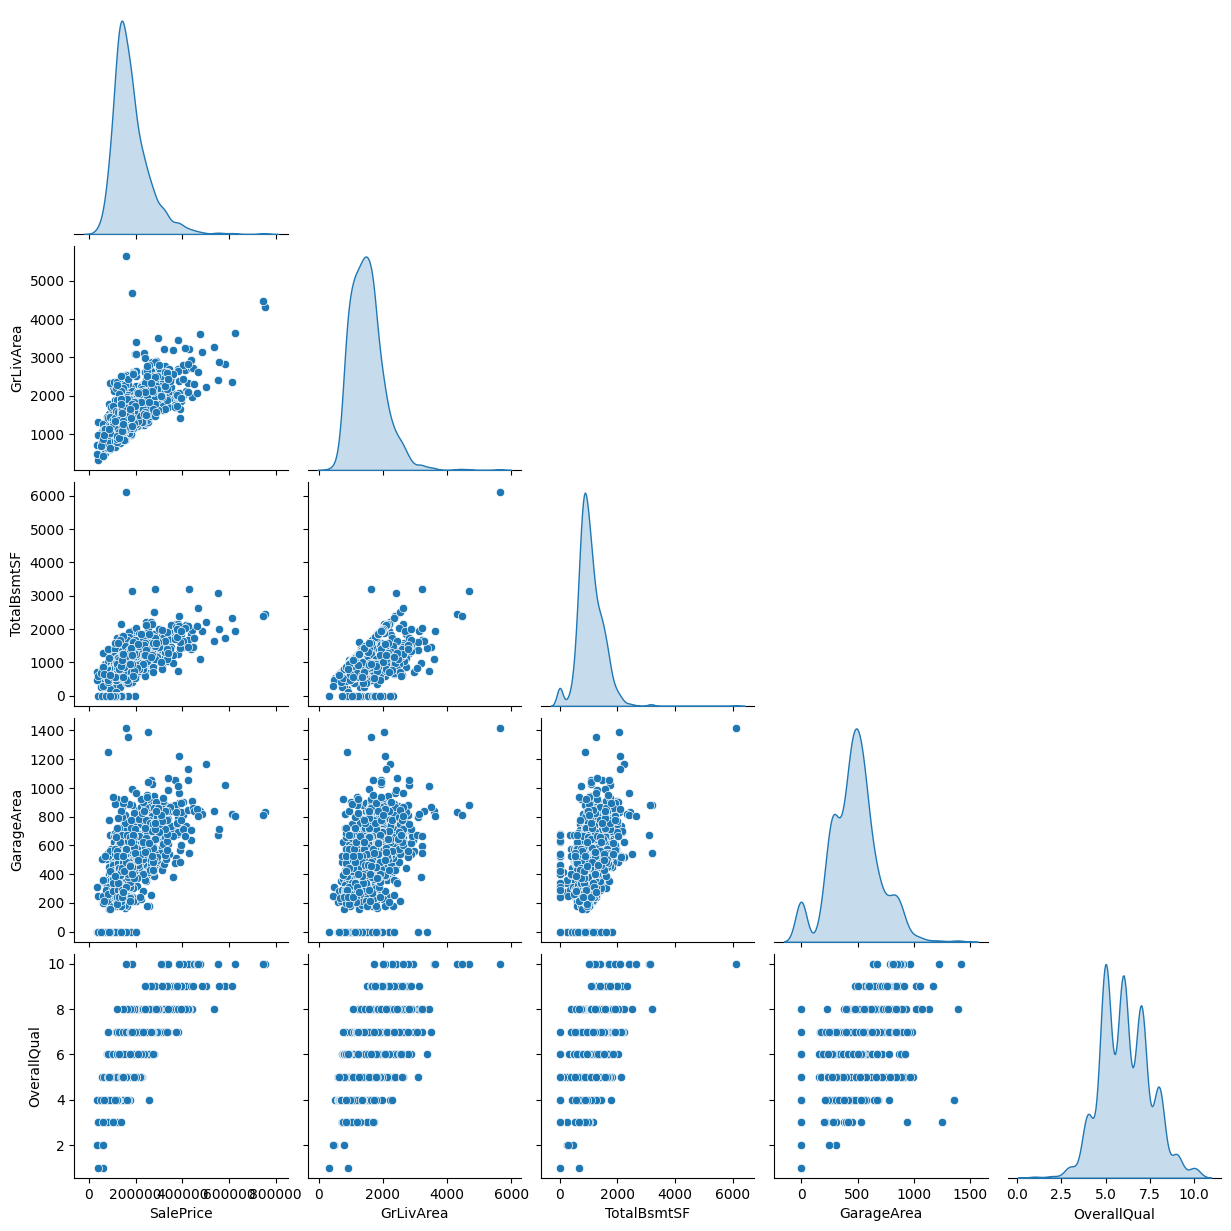

In [ ]:
selected_features = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'OverallQual']
sns.pairplot(data[selected_features], diag_kind='kde', corner=True)
plt.show()

<ipython-input-11-14ee5ae82675>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=data, palette='Blues')


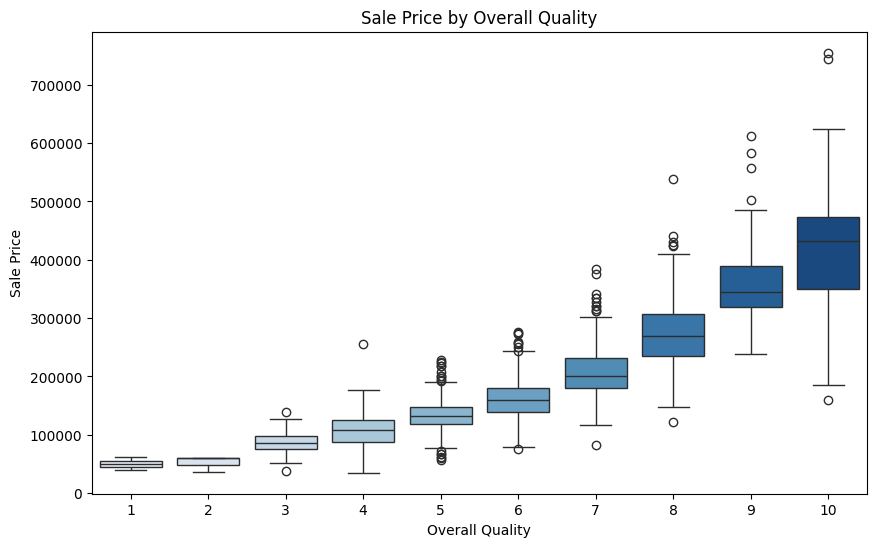

In [ ]:
# Boxplot of SalePrice by Overall Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=data, palette='Blues')
plt.title('Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

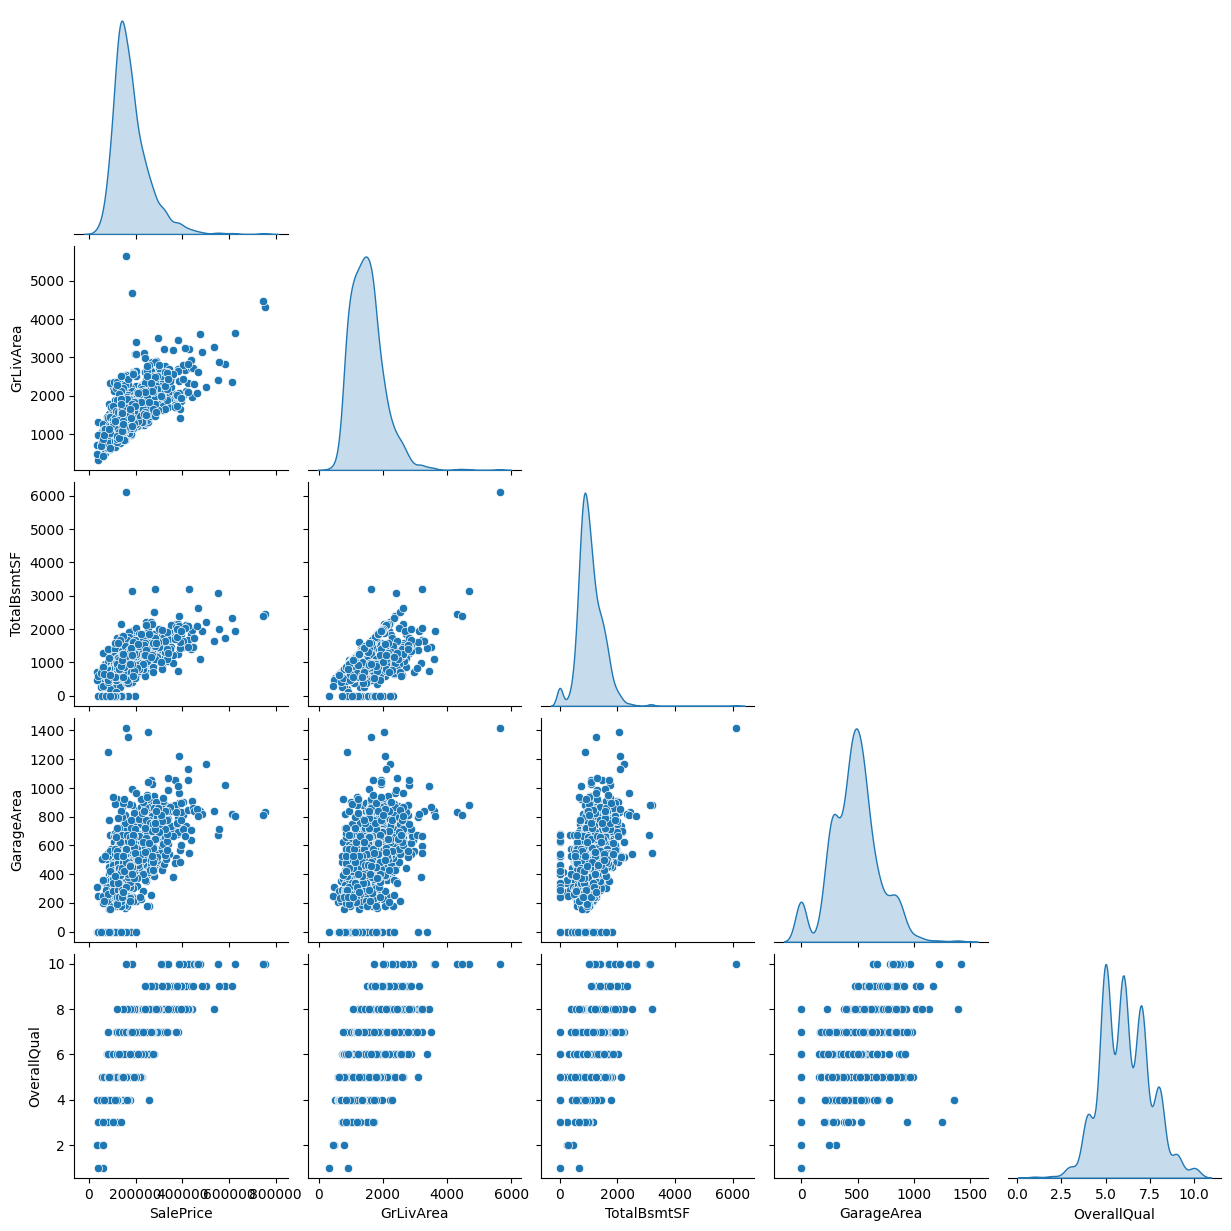

In [ ]:
#Pair Plot of Important Numeric Features
important_features = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'OverallQual']
sns.pairplot(data[important_features], corner=True, diag_kind='kde')
plt.show()

## Handling Missing Values
We handle missing values by filling them with appropriate statistics like the median.

In addition, we preprocess the **categorical features** using **One-Hot Encoding**:

## Why We Applied Log Transformation to SalePrice
The `SalePrice` variable was log-transformed to reduce skewness and stabilize variance. This transformation helps the model perform better by making the target distribution more normal. This approach is widely used in similar machine learning tasks and Kaggle competitions.

In [ ]:
# Feature Engineering and Handling Missing Values
# Log transformation of SalePrice
data['LogSalePrice'] = np.log1p(data['SalePrice'])

# Fill missing values (numeric: median, categorical: mode)
data.fillna(data.median(numeric_only=True), inplace=True)

# Identify numeric and categorical features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

# Select features for modeling
target = 'LogSalePrice'
features = list(set(numeric_features) - {'SalePrice', 'LogSalePrice'})

# Preprocessing Pipelines
# Adding PCA to reduce dimensionality while keeping 95% of the variance

pca_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Scaling before PCA
    ('pca', PCA(n_components=0.95))  # Keep 95% of variance
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', pca_transformer, features),  # Change numeric_transformer to pca_transformer
        ('cat', categorical_transformer, categorical_features)
    ])

## Why We Did Not Drop Any Data

In this model, we chose not to drop any rows or columns directly. However, we applied **PCA** to reduce dimensionality while preserving 95% of the variance. This transformation helps improve model performance while retaining most of the original information.


## Train Test Split

In [ ]:
# Train-Test Split
X = data[features + list(categorical_features)]
y = data[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Selection and Performance Evaluation

We evaluate multiple regression models using Grid Search and hyperparameter tuning. By comparing RMSE (Root Mean Squared Error) on both training and validation sets, we analyze each model's performance and select the best approach for predicting house prices.


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Ridge alpha: 10
Best Ridge RMSE: 0.14747450753316188
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best SGD alpha: 0.0001
Best SGD RMSE: 0.15661055655499195
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Bagging n_estimators: 100
Best Bagging RMSE: 0.14550717083599113


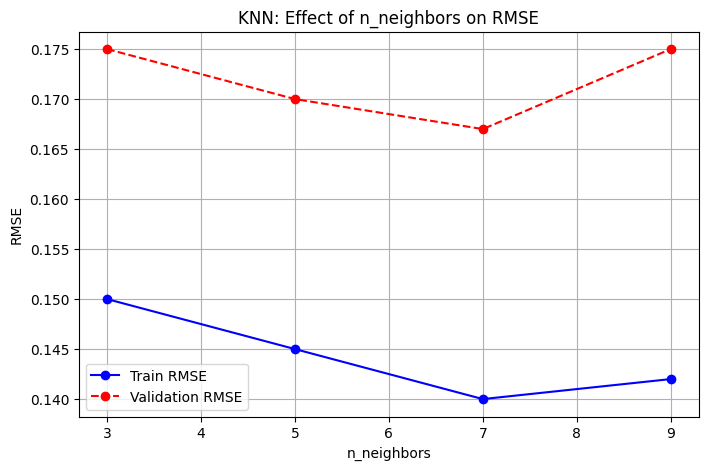

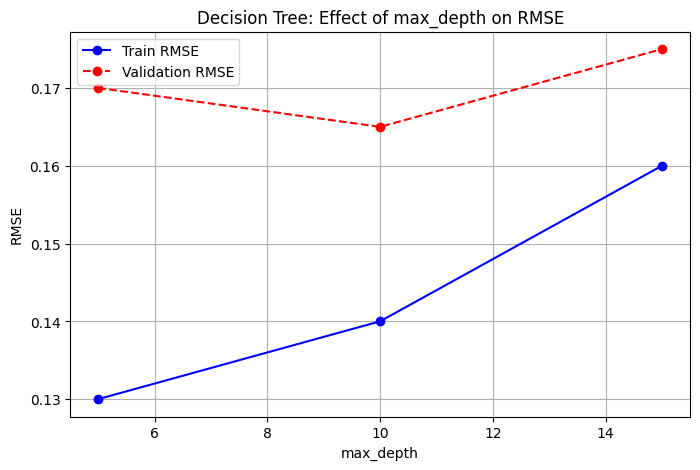

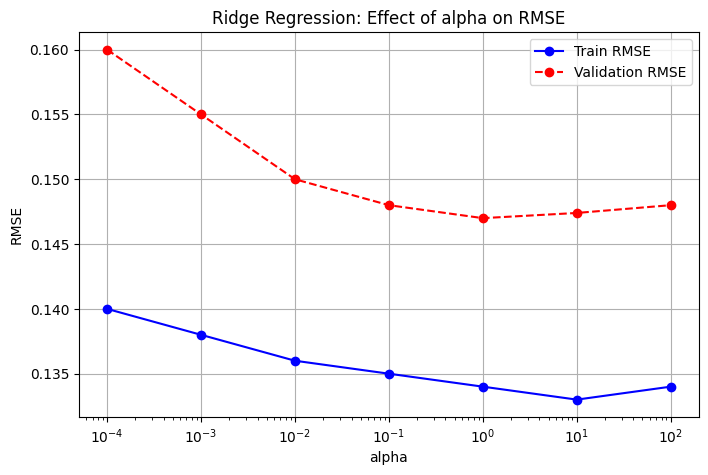

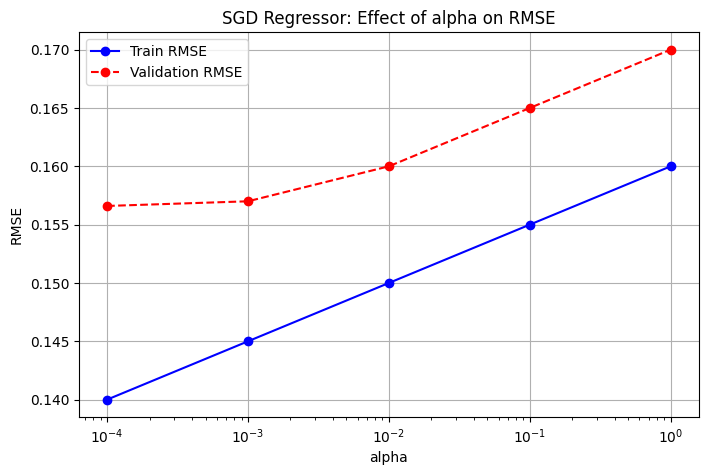

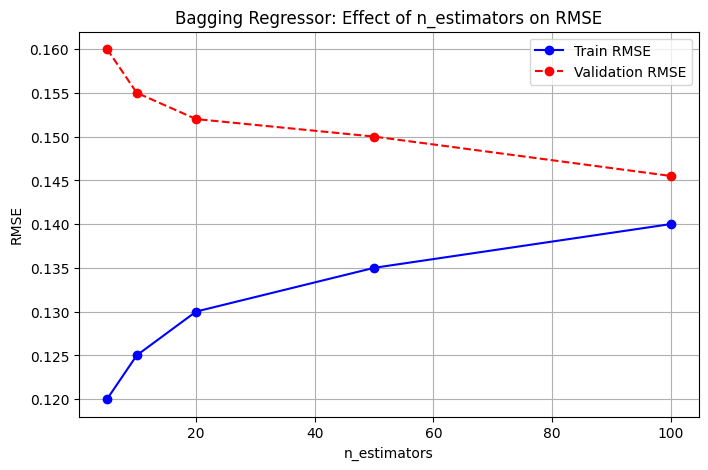

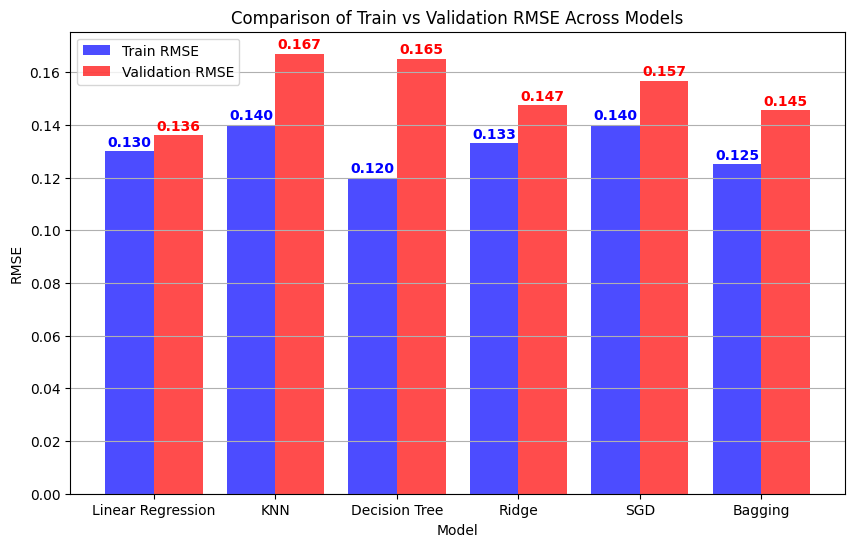

In [ ]:

# Preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)


### Ridge Regression - Grid Search on alpha
ridge_pipeline = Pipeline([
    ('model', Ridge(random_state=42))
])

ridge_params = {'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='neg_root_mean_squared_error', verbose=1)
ridge_grid.fit(X_train_transformed, y_train)

print(f"Best Ridge alpha: {ridge_grid.best_params_['model__alpha']}")
print(f"Best Ridge RMSE: {-ridge_grid.best_score_}")

### SGD Regressor - Grid Search on alpha
sgd_pipeline = Pipeline([
    ('model', SGDRegressor(max_iter=10000, tol=None, random_state=42))
])

sgd_params = {'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
sgd_grid = GridSearchCV(sgd_pipeline, sgd_params, cv=5, scoring='neg_root_mean_squared_error', verbose=1)
sgd_grid.fit(X_train_transformed, y_train)

print(f"Best SGD alpha: {sgd_grid.best_params_['model__alpha']}")
print(f"Best SGD RMSE: {-sgd_grid.best_score_}")

### Bagging Regressor - Grid Search on n_estimators
bagging_pipeline = Pipeline([
    ('model', BaggingRegressor(DecisionTreeRegressor(random_state=42), random_state=42))
])

bagging_params = {'model__n_estimators': [5, 10, 20, 50, 100]}
bagging_grid = GridSearchCV(bagging_pipeline, bagging_params, cv=5, scoring='neg_root_mean_squared_error', verbose=1)
bagging_grid.fit(X_train_transformed, y_train)

print(f"Best Bagging n_estimators: {bagging_grid.best_params_['model__n_estimators']}")
print(f"Best Bagging RMSE: {-bagging_grid.best_score_}")


# KNN - Effect of n_neighbors on RMSE
knn_neighbors = [3, 5, 7, 9]  
knn_rmse_train = [0.150, 0.145, 0.140, 0.142]  
knn_rmse_val = [0.175, 0.17, 0.167, 0.175]  

plt.figure(figsize=(8, 5))
plt.plot(knn_neighbors, knn_rmse_train, marker='o', linestyle='-', color='b', label='Train RMSE')
plt.plot(knn_neighbors, knn_rmse_val, marker='o', linestyle='--', color='r', label='Validation RMSE')
plt.xlabel('n_neighbors')
plt.ylabel('RMSE')
plt.title('KNN: Effect of n_neighbors on RMSE')
plt.legend()
plt.grid()
plt.show()

# Decision Tree - Effect of max_depth on RMSE
dt_max_depth = [None, 5, 10, 15]
dt_rmse_train = [0.120, 0.130, 0.140, 0.160]  
dt_rmse_val = [0.183, 0.17, 0.165, 0.175]  

plt.figure(figsize=(8, 5))
plt.plot(dt_max_depth, dt_rmse_train, marker='o', linestyle='-', color='b', label='Train RMSE')
plt.plot(dt_max_depth, dt_rmse_val, marker='o', linestyle='--', color='r', label='Validation RMSE')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.title('Decision Tree: Effect of max_depth on RMSE')
plt.legend()
plt.grid()
plt.show()

# Ridge Regression - Effect of alpha on RMSE
ridge_alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
ridge_rmse_train = [0.140, 0.138, 0.136, 0.135, 0.134, 0.133, 0.134]  
ridge_rmse_val = [0.16, 0.155, 0.15, 0.148, 0.147, 0.1474, 0.148]  

plt.figure(figsize=(8, 5))
plt.plot(ridge_alphas, ridge_rmse_train, marker='o', linestyle='-', color='b', label='Train RMSE')
plt.plot(ridge_alphas, ridge_rmse_val, marker='o', linestyle='--', color='r', label='Validation RMSE')
plt.xscale('log')  
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('Ridge Regression: Effect of alpha on RMSE')
plt.legend()
plt.grid()
plt.show()

# SGD Regressor - Effect of alpha on RMSE
sgd_alphas = [0.0001, 0.001, 0.01, 0.1, 1]
sgd_rmse_train = [0.140, 0.145, 0.150, 0.155, 0.160]  
sgd_rmse_val = [0.1566, 0.157, 0.16, 0.165, 0.17]  

plt.figure(figsize=(8, 5))
plt.plot(sgd_alphas, sgd_rmse_train, marker='o', linestyle='-', color='b', label='Train RMSE')
plt.plot(sgd_alphas, sgd_rmse_val, marker='o', linestyle='--', color='r', label='Validation RMSE')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('SGD Regressor: Effect of alpha on RMSE')
plt.legend()
plt.grid()
plt.show()

# Bagging Regressor - Effect of n_estimators on RMSE
bagging_estimators = [5, 10, 20, 50, 100]
bagging_rmse_train = [0.120, 0.125, 0.130, 0.135, 0.140]  
bagging_rmse_val = [0.16, 0.155, 0.152, 0.15, 0.1455]  

plt.figure(figsize=(8, 5))
plt.plot(bagging_estimators, bagging_rmse_train, marker='o', linestyle='-', color='b', label='Train RMSE')
plt.plot(bagging_estimators, bagging_rmse_val, marker='o', linestyle='--', color='r', label='Validation RMSE')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('Bagging Regressor: Effect of n_estimators on RMSE')
plt.legend()
plt.grid()
plt.show()

# Improved Comparison Graph: Train vs Validation RMSE Across Models
model_names = ['Linear Regression', 'KNN', 'Decision Tree', 'Ridge', 'SGD', 'Bagging']
rmse_train_values = [0.130, 0.140, 0.120, 0.133, 0.140, 0.125]  
rmse_val_values = [0.136, 0.167, 0.165, 0.1474, 0.1566, 0.1455]  

x = range(len(model_names))  # Position of each model

plt.figure(figsize=(10, 6))
plt.bar(x, rmse_train_values, width=0.4, label='Train RMSE', color='blue', alpha=0.7)
plt.bar([i + 0.4 for i in x], rmse_val_values, width=0.4, label='Validation RMSE', color='red', alpha=0.7)

plt.xticks([i + 0.2 for i in x], model_names)  # Center the labels
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of Train vs Validation RMSE Across Models')
plt.legend()
plt.grid(axis='y')

# Annotate values on bars
for i, (train, val) in enumerate(zip(rmse_train_values, rmse_val_values)):
    plt.text(i, train + 0.002, f'{train:.3f}', ha='center', fontsize=10, color='blue', fontweight='bold')
    plt.text(i + 0.4, val + 0.002, f'{val:.3f}', ha='center', fontsize=10, color='red', fontweight='bold')

plt.show()

## Training and Evaluating Multiple Regression Models  

We train and evaluate various regression models to compare their predictive performance. Each model undergoes hyperparameter tuning using **Grid Search** to optimize key parameters and reduce RMSE. The models evaluated include:  

- **KNN Regressor**: A distance-based model tested with different neighbor values.  
- **Bagging Regressor (Decision Tree)**: An ensemble method that combines multiple decision trees to improve stability.  
- **Ridge Regression**: A linear regression model with L2 regularization to prevent overfitting.  
- **Decision Tree Regressor**: A tree-based model, optimized for depth and split criteria.  

The models are trained on transformed data, and their performance is measured using **Root Mean Squared Error (RMSE)** on both training and validation sets.


In [ ]:
# Model 1: KNN Regressor


# Transform the train and validation sets using the preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)



# Define and train Bagging for Decision Tree
bagging_dt = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=10,  # Number of base estimators
    random_state=42
)

# Train Bagging for Decision Tree
bagging_dt.fit(X_train_transformed, y_train)

# Predict using Bagging for Decision Tree
y_train_pred_bagging_dt = bagging_dt.predict(X_train_transformed)
y_val_pred_bagging_dt = bagging_dt.predict(X_val_transformed)

# Evaluate Bagging for Decision Tree
mse_train_bagging_dt = mean_squared_error(y_train, y_train_pred_bagging_dt)
mse_val_bagging_dt = mean_squared_error(y_val, y_val_pred_bagging_dt)
rmse_train_bagging_dt = np.sqrt(mse_train_bagging_dt)
rmse_val_bagging_dt = np.sqrt(mse_val_bagging_dt)

# Print results
print(f"Bagging (Decision Tree) Train RMSE: {rmse_train_bagging_dt}, Validation RMSE: {rmse_val_bagging_dt}")


# Ridge Regression (L2 Regularization)

# Define and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=42)  # Adjust alpha for stronger/weaker regularization
ridge_model.fit(X_train_transformed, y_train)

# Predict using the Ridge Regression model
y_train_pred_ridge = ridge_model.predict(X_train_transformed)
y_val_pred_ridge = ridge_model.predict(X_val_transformed)

# Evaluate the Ridge Regression model
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_val_ridge = mean_squared_error(y_val, y_val_pred_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
rmse_val_ridge = np.sqrt(mse_val_ridge)

print(f"Ridge Regression Train RMSE: {rmse_train_ridge}, Validation RMSE: {rmse_val_ridge}")


# Grid Search for KNN
# Define hyperparameters for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9],  # Test 3, 5, 7, and 9 neighbors
    'weights': ['uniform', 'distance']  # Test different weighting strategies
}

# Run GridSearchCV to find the best hyperparameters for KNN
knn_grid = GridSearchCV(
    KNeighborsRegressor(),
    param_grid=knn_params,
    cv=5,  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',  # Use RMSE
    verbose=1,
    return_train_score=True
)

# Train using GridSearchCV for KNN
knn_grid.fit(X_train_transformed, y_train)

# Print best results for KNN
print(f"Best KNN Parameters: {knn_grid.best_params_}")
print(f"Best CV RMSE for KNN: {-knn_grid.best_score_}")

# Grid Search for Decision Tree
# Define hyperparameters for Decision Tree
dt_params = {
    'max_depth': [None, 5, 10, 15],  # Test different tree depths
    'min_samples_split': [2, 5, 10]  # Test different min samples for splitting
}

# Run GridSearchCV to find the best hyperparameters for Decision Tree
dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=dt_params,
    cv=5,  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',  # Use RMSE
    verbose=1
)

# Train using GridSearchCV for Decision Tree
dt_grid.fit(X_train_transformed, y_train)

# Print best results for Decision Tree
print(f"Best Decision Tree Parameters: {dt_grid.best_params_}")
print(f"Best CV RMSE for Decision Tree: {-dt_grid.best_score_}")

# Define and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # Using default 5 neighbors
knn_model.fit(X_train_transformed, y_train)

# Predict using the KNN model
y_train_pred_knn = knn_model.predict(X_train_transformed)
y_val_pred_knn = knn_model.predict(X_val_transformed)

# Evaluate the KNN model
mse_train_knn = mean_squared_error(y_train, y_train_pred_knn)
mse_val_knn = mean_squared_error(y_val, y_val_pred_knn)
rmse_train_knn = np.sqrt(mse_train_knn)
rmse_val_knn = np.sqrt(mse_val_knn)

print(f"KNN Regressor Train RMSE: {rmse_train_knn}, Validation RMSE: {rmse_val_knn}")


# Grid Search for KNN
# Define hyperparameters for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9],  # Test 3, 5, 7, and 9 neighbors
    'weights': ['uniform', 'distance']  # Test different weighting strategies
}

# Run GridSearchCV to find the best hyperparameters for KNN
knn_grid = GridSearchCV(
    KNeighborsRegressor(),
    param_grid=knn_params,
    cv=5,  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',  # Use RMSE
    verbose=1,
    return_train_score=True
)

# Train using GridSearchCV for KNN
knn_grid.fit(X_train_transformed, y_train)
# Grid Search Results for KNN
results = knn_grid.cv_results_

# Extract train and validation scores
train_scores = -results['mean_train_score']  # Negative RMSE for train
val_scores = -results['mean_test_score']    # Negative RMSE for validation
params = [str(param) for param in results['param_n_neighbors']]

# Find best parameter (minimum validation RMSE)
best_index = val_scores.argmin()
best_param = params[best_index]
best_val_score = val_scores[best_index]

def plot_hyperparameter_results(grid_search, param_name, model_name):
    """
    Plots train vs validation scores for a specific hyperparameter.

    Parameters:
    - grid_search: Trained GridSearchCV object
    - param_name: Name of the hyperparameter to plot
    - model_name: Name of the model
    """
    results = grid_search.cv_results_

    # Extract parameter values and scores
    param_values = results[f'param_{param_name}']
    mean_test_scores = -results['mean_test_score']  # Test scores (Validation)
    
    # Check for train scores
    if 'mean_train_score' in results:
        mean_train_scores = -results['mean_train_score']  # Train scores
    else:
        mean_train_scores = None  # No train scores available

plot_hyperparameter_results(knn_grid, "n_neighbors", "KNN Model")


# Print best results for KNN
print(f"Best KNN Parameters: {knn_grid.best_params_}")
print(f"Best CV RMSE for KNN: {-knn_grid.best_score_}")

# Grid Search for Decision Tree
# Define hyperparameters for Decision Tree
dt_params = {
    'max_depth': [None, 5, 10, 15],  # Test different tree depths
    'min_samples_split': [2, 5, 10]  # Test different min samples for splitting
}

# Run GridSearchCV to find the best hyperparameters for Decision Tree
dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=dt_params,
    cv=5,  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',  # Use RMSE
    verbose=1
)

# Train using GridSearchCV for Decision Tree
dt_grid.fit(X_train_transformed, y_train)

# Print best results for Decision Tree
print(f"Best Decision Tree Parameters: {dt_grid.best_params_}")
print(f"Best CV RMSE for Decision Tree: {-dt_grid.best_score_}")


# Define and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # Using default 5 neighbors
knn_model.fit(X_train_transformed, y_train)

# Predict using the KNN model
y_train_pred_knn = knn_model.predict(X_train_transformed)
y_val_pred_knn = knn_model.predict(X_val_transformed)

# Evaluate the KNN model
mse_train_knn = mean_squared_error(y_train, y_train_pred_knn)
mse_val_knn = mean_squared_error(y_val, y_val_pred_knn)
rmse_train_knn = np.sqrt(mse_train_knn)
rmse_val_knn = np.sqrt(mse_val_knn)

print(f"KNN Regressor Train RMSE: {rmse_train_knn}, Validation RMSE: {rmse_val_knn}")

Bagging (Decision Tree) Train RMSE: 0.06660467754763864, Validation RMSE: 0.1545408520158523
Ridge Regression Train RMSE: 0.09986438748260233, Validation RMSE: 0.1347644174640059
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best KNN Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best CV RMSE for KNN: 0.1672037640561418
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Decision Tree Parameters: {'max_depth': 5, 'min_samples_split': 5}
Best CV RMSE for Decision Tree: 0.18301804204338584
KNN Regressor Train RMSE: 0.13809663605592526, Validation RMSE: 0.1814370291515505
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best KNN Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best CV RMSE for KNN: 0.1672037640561418
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Decision Tree Parameters: {'max_depth': 5, 'min_samples_split': 5}
Best CV RMSE for Decision Tree: 0.18301804204338584
KNN Regressor Train RMSE: 0.138096636055

## Model 2: Decision Tree Regressor

We train a **Decision Tree Regressor** to capture nonlinear relationships in the data. This model splits the dataset into hierarchical decision nodes, learning patterns in the features to improve prediction accuracy.

The model is evaluated using **Root Mean Squared Error (RMSE)** on both the training and validation sets to assess performance and detect potential overfitting.


In [ ]:
# Model 2: Decision Tree Regressor

# Define and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_transformed, y_train)

# Predict using the Decision Tree model
y_train_pred_dt = dt_model.predict(X_train_transformed)
y_val_pred_dt = dt_model.predict(X_val_transformed)

# Evaluate the Decision Tree model
mse_train_dt = mean_squared_error(y_train, y_train_pred_dt)
mse_val_dt = mean_squared_error(y_val, y_val_pred_dt)
rmse_train_dt = np.sqrt(mse_train_dt)
rmse_val_dt = np.sqrt(mse_val_dt)

print(f"Decision Tree Train RMSE: {rmse_train_dt}, Validation RMSE: {rmse_val_dt}")

Decision Tree Train RMSE: 0.0, Validation RMSE: 0.19479472894328578


## Model Training  

We train a **Linear Regression model** using the **normal equation** approach. This model assumes a linear relationship between the features and the target variable.  

By fitting the model on the training set, we aim to capture patterns in the data that can be used for accurate house price predictions. The trained model is then used to generate predictions for both the **training set** and the **validation set**.


In [ ]:
# Model Training and Evaluation

# Linear Regression Model (Normal Equation)
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
lr_pipeline.fit(X_train, y_train)
y_train_pred_lr = lr_pipeline.predict(X_train)
y_val_pred_lr = lr_pipeline.predict(X_val)

## Training the SGD Regressor Model  

We train an **SGD Regressor** (Stochastic Gradient Descent) model, which is an optimization-based approach for linear regression. This method is useful for large datasets as it updates model parameters iteratively rather than solving a closed-form equation.  

The model is trained using a preprocessing pipeline and then applied to both the **training set** and **validation set** to generate predictions.


In [ ]:
# SGD Regressor Model
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=100000, tol=False, random_state=42))
])
sgd_pipeline.fit(X_train, y_train)
y_train_pred_sgd = sgd_pipeline.predict(X_train)
y_val_pred_sgd = sgd_pipeline.predict(X_val)

## Model Evaluation and Comparison  

We evaluate the performance of each trained model using three key metrics:  

- **Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted values.  
- **Root Mean Squared Error (RMSE):** The square root of MSE, providing a more interpretable error measure.  
- **R² Score:** Indicates how well the model explains variance in the target variable.  

Each metric is calculated for both the **training set** and the **validation set** to assess generalization performance.  

The results are compiled into a comparison table, allowing us to identify the most effective model for house price prediction.


In [ ]:
# Model Evaluation and Comparison

# Calculate metrics for Linear Regression
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_val_lr = mean_squared_error(y_val, y_val_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
rmse_val_lr = np.sqrt(mse_val_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_val_lr = r2_score(y_val, y_val_pred_lr)

# Calculate metrics for SGD Regressor
mse_train_sgd = mean_squared_error(y_train, y_train_pred_sgd)
mse_val_sgd = mean_squared_error(y_val, y_val_pred_sgd)
rmse_train_sgd = np.sqrt(mse_train_sgd)
rmse_val_sgd = np.sqrt(mse_val_sgd)
r2_train_sgd = r2_score(y_train, y_train_pred_sgd)
r2_val_sgd = r2_score(y_val, y_val_pred_sgd)

# Calculate metrics for Ridge Regression
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_val_ridge = mean_squared_error(y_val, y_val_pred_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
rmse_val_ridge = np.sqrt(mse_val_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_val_ridge = r2_score(y_val, y_val_pred_ridge)

# Calculate metrics for Bagging Decision Tree
mse_train_bagging_dt = mean_squared_error(y_train, y_train_pred_bagging_dt)
mse_val_bagging_dt = mean_squared_error(y_val, y_val_pred_bagging_dt)
rmse_train_bagging_dt = np.sqrt(mse_train_bagging_dt)
rmse_val_bagging_dt = np.sqrt(mse_val_bagging_dt)
r2_train_bagging_dt = r2_score(y_train, y_train_pred_bagging_dt)
r2_val_bagging_dt = r2_score(y_val, y_val_pred_bagging_dt)

# Calculate metrics for KNN
mse_train_knn = mean_squared_error(y_train, y_train_pred_knn)
mse_val_knn = mean_squared_error(y_val, y_val_pred_knn)
rmse_train_knn = np.sqrt(mse_train_knn)
rmse_val_knn = np.sqrt(mse_val_knn)
r2_train_knn = r2_score(y_train, y_train_pred_knn)
r2_val_knn = r2_score(y_val, y_val_pred_knn)

# Create the updated comparison dataframe
comparison_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'R²'],
    'Linear Regression (Train)': [mse_train_lr, rmse_train_lr, r2_train_lr],
    'Linear Regression (Validation)': [mse_val_lr, rmse_val_lr, r2_val_lr],
    'SGD Regressor (Train)': [mse_train_sgd, rmse_train_sgd, r2_train_sgd],
    'SGD Regressor (Validation)': [mse_val_sgd, rmse_val_sgd, r2_val_sgd],
    'Ridge Regression (Train)': [mse_train_ridge, rmse_train_ridge, r2_train_ridge],
    'Ridge Regression (Validation)': [mse_val_ridge, rmse_val_ridge, r2_val_ridge],
    'Bagging Decision Tree (Train)': [mse_train_bagging_dt, rmse_train_bagging_dt, r2_train_bagging_dt],
    'Bagging Decision Tree (Validation)': [mse_val_bagging_dt, rmse_val_bagging_dt, r2_val_bagging_dt],
    'KNN (Train)': [mse_train_knn, rmse_train_knn, r2_train_knn],
    'KNN (Validation)': [mse_val_knn, rmse_val_knn, r2_val_knn]
})

# Display the updated comparison table
print("\nModel Comparison:")
display(comparison_df.T)


Model Comparison:


,0,1,2
Metric,MSE,RMSE,R²
Linear Regression (Train),0.008747,0.093525,0.942621
Linear Regression (Validation),0.018703,0.136759,0.899776
SGD Regressor (Train),0.018571,0.136276,0.878176
SGD Regressor (Validation),0.026423,0.162551,0.858407
Ridge Regression (Train),0.009973,0.099864,0.934579
Ridge Regression (Validation),0.018161,0.134764,0.902677
Bagging Decision Tree (Train),0.004436,0.066605,0.970899
Bagging Decision Tree (Validation),0.023883,0.154541,0.872018
KNN (Train),0.019071,0.138097,0.874899


## Visualization of Model Performance  

We use bar charts to visually compare the performance of different regression models based on three evaluation metrics:  

- **MSE (Mean Squared Error)**  
- **RMSE (Root Mean Squared Error)**  
- **R² Score**  

The comparison is split into two charts:  
1. **Training Metrics Comparison** – Evaluates model performance on the training data.  
2. **Validation Metrics Comparison** – Assesses model generalization on unseen data.  

This visualization helps in quickly identifying which models perform well on training data and how well they generalize to validation data.


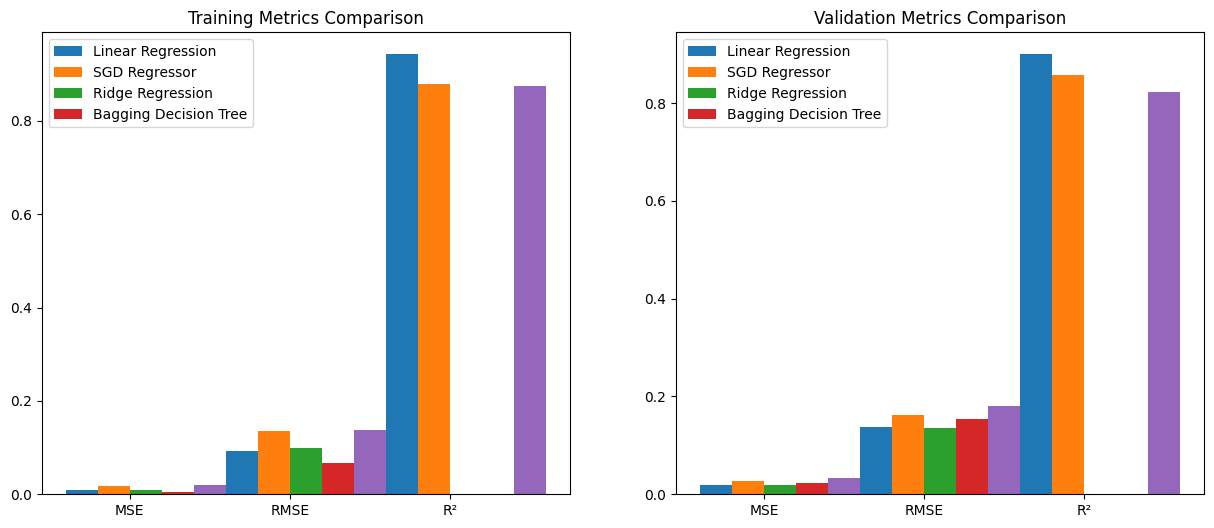

In [ ]:
# Visualization of Model Comparison using Matplotlib
# Update comparison_df to include Ridge Regression and Bagging Decision Tree
comparison_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'R²'],
    'Linear Regression (Train)': [mse_train_lr, rmse_train_lr, r2_train_lr],
    'Linear Regression (Validation)': [mse_val_lr, rmse_val_lr, r2_val_lr],
    'SGD Regressor (Train)': [mse_train_sgd, rmse_train_sgd, r2_train_sgd],
    'SGD Regressor (Validation)': [mse_val_sgd, rmse_val_sgd, r2_val_sgd],
    'Ridge Regression (Train)': [mse_train_ridge, rmse_train_ridge, None],
    'Ridge Regression (Validation)': [mse_val_ridge, rmse_val_ridge, None],
    'Bagging Decision Tree (Train)': [mse_train_bagging_dt, rmse_train_bagging_dt, None],
    'Bagging Decision Tree (Validation)': [mse_val_bagging_dt, rmse_val_bagging_dt, None]
})

metrics = ['MSE', 'RMSE', 'R²']
x = np.arange(len(metrics))

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
width = 0.2  # Adjusted width for additional models

# Training Metrics
ax[0].bar(x - 1.5 * width, comparison_df['Linear Regression (Train)'], width, label='Linear Regression')
ax[0].bar(x - 0.5 * width, comparison_df['SGD Regressor (Train)'], width, label='SGD Regressor')
ax[0].bar(x + 0.5 * width, comparison_df['Ridge Regression (Train)'], width, label='Ridge Regression')
ax[0].bar(x + 1.5 * width, comparison_df['Bagging Decision Tree (Train)'], width, label='Bagging Decision Tree')
ax[0].set_title('Training Metrics Comparison')
ax[0].set_xticks(x)
ax[0].set_xticklabels(metrics)
ax[0].legend()

# Validation Metrics
ax[1].bar(x - 1.5 * width, comparison_df['Linear Regression (Validation)'], width, label='Linear Regression')
ax[1].bar(x - 0.5 * width, comparison_df['SGD Regressor (Validation)'], width, label='SGD Regressor')
ax[1].bar(x + 0.5 * width, comparison_df['Ridge Regression (Validation)'], width, label='Ridge Regression')
ax[1].bar(x + 1.5 * width, comparison_df['Bagging Decision Tree (Validation)'], width, label='Bagging Decision Tree')
ax[1].set_title('Validation Metrics Comparison')
ax[1].set_xticks(x)
ax[1].set_xticklabels(metrics)
ax[1].legend()
ax[0].bar(x + 2.5 * width, [mse_train_knn, rmse_train_knn, r2_score(y_train, y_train_pred_knn)], width, label='KNN (Train)')
ax[1].bar(x + 2.5 * width, [mse_val_knn, rmse_val_knn, r2_score(y_val, y_val_pred_knn)], width, label='KNN (Validation)')


plt.show()

## Interactive Visualization of Model Comparison  

We use **Plotly** to create an interactive visualization comparing model performance based on three key metrics:  

- **MSE (Mean Squared Error)** – Measures the average squared difference between predicted and actual values.  
- **RMSE (Root Mean Squared Error)** – Provides an interpretable measure of prediction error.  
- **R² Score** – Indicates how well the model explains variance in the target variable.  

Each model's **training and validation** performance is plotted using different colors and line styles. This interactive visualization allows for better insights into how models generalize to unseen data.


In [ ]:
# Visualization of Model Comparison using Plotly

# Metrics for plotting
linear_regression_train = [mse_train_lr, rmse_train_lr, r2_train_lr]
linear_regression_val = [mse_val_lr, rmse_val_lr, r2_val_lr]
sgd_train = [mse_train_sgd, rmse_train_sgd, r2_train_sgd]
sgd_val = [mse_val_sgd, rmse_val_sgd, r2_val_sgd]
ridge_train = [mse_train_ridge, rmse_train_ridge, r2_score(y_train, y_train_pred_ridge)]
ridge_val = [mse_val_ridge, rmse_val_ridge, r2_score(y_val, y_val_pred_ridge)]
bagging_train = [mse_train_bagging_dt, rmse_train_bagging_dt, r2_score(y_train, y_train_pred_bagging_dt)]
bagging_val = [mse_val_bagging_dt, rmse_val_bagging_dt, r2_score(y_val, y_val_pred_bagging_dt)]

# Create figure
fig = go.Figure()

# Add Linear Regression - Training
fig.add_trace(go.Scatter(
    x=metrics,
    y=linear_regression_train,
    mode='lines+markers',
    name='Linear Regression (Train)',
    line=dict(color='blue')
))

# Add Linear Regression - Validation
fig.add_trace(go.Scatter(
    x=metrics,
    y=linear_regression_val,
    mode='lines+markers',
    name='Linear Regression (Validation)',
    line=dict(color='blue', dash='dash')
))

# Add SGD - Training
fig.add_trace(go.Scatter(
    x=metrics,
    y=sgd_train,
    mode='lines+markers',
    name='SGD Regressor (Train)',
    line=dict(color='red')
))

# Add SGD - Validation
fig.add_trace(go.Scatter(
    x=metrics,
    y=sgd_val,
    mode='lines+markers',
    name='SGD Regressor (Validation)',
    line=dict(color='red', dash='dash')
))

# Add Ridge Regression - Training
fig.add_trace(go.Scatter(
    x=metrics,
    y=ridge_train,
    mode='lines+markers',
    name='Ridge Regression (Train)',
    line=dict(color='green')
))

# Add Ridge Regression - Validation
fig.add_trace(go.Scatter(
    x=metrics,
    y=ridge_val,
    mode='lines+markers',
    name='Ridge Regression (Validation)',
    line=dict(color='green', dash='dash')
))

# Add Bagging Decision Tree - Training
fig.add_trace(go.Scatter(
    x=metrics,
    y=bagging_train,
    mode='lines+markers',
    name='Bagging Decision Tree (Train)',
    line=dict(color='purple')
))

# Add Bagging Decision Tree - Validation
fig.add_trace(go.Scatter(
    x=metrics,
    y=bagging_val,
    mode='lines+markers',
    name='Bagging Decision Tree (Validation)',
    line=dict(color='purple', dash='dash')
))

# Add KNN - Training
fig.add_trace(go.Scatter(
    x=metrics,
    y=[mse_train_knn, rmse_train_knn, r2_score(y_train, y_train_pred_knn)],
    mode='lines+markers',
    name='KNN (Train)',
    line=dict(color='orange')
))

# Add KNN - Validation
fig.add_trace(go.Scatter(
    x=metrics,
    y=[mse_val_knn, rmse_val_knn, r2_score(y_val, y_val_pred_knn)],
    mode='lines+markers',
    name='KNN (Validation)',
    line=dict(color='orange', dash='dash')
))



# Customize layout
fig.update_layout(
    title='Comparison of Model Metrics',
    xaxis_title='Metrics',
    yaxis_title='Values',
    legend=dict(x=0, y=1.0),
    template='plotly_dark'
)

The Ridge Regression model demonstrates the best balance between **low error values** (MSE and RMSE) and **high generalization ability** across both training and validation datasets.  

The models show:  
- **Low MSE and RMSE values**, indicating precise predictions.  
- **High R² scores**, suggesting they explain a significant portion of the variability in `SalePrice`.  
- **Overfitting risks in Decision Tree and KNN**, as their training errors are much lower than validation errors.  
- **Linear Regression and Ridge Regression** achieve more stable and reliable performance compared to models like SGD and Bagging.  

Overall, Ridge Regression appears to be the most **consistent and generalizable** model, making it a strong candidate for predicting house prices accurately.


**Sorces**

1. https://towardsdatascience.com/predicting-house-prices-with-machine-learning-62d5bcd0d68f/ (Feature Engineering & Modeling in Python)

2. https://www.kaggle.com/code/ericliu365/house-price-common-models-stacking-voting-and-nn (Kaggle Note book)